<a href="https://colab.research.google.com/github/jellyXuuuuu/CovidNetDeepLearning/blob/main/6_update_lung_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# import

In [1]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2 as cv
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

import tensorflow.compat.v1 as tf
import os, argparse
import cv2
import pandas as pd
from tqdm import tqdm
import json

# Load files

In [2]:
!cp -r 'drive/MyDrive/covid/models/' .

In [3]:
!cp -r 'drive/MyDrive/covid/labels/' .

In [4]:
!cp -r 'drive/MyDrive/covid/assets/' .

## Load other dataset

In [5]:
# covid-chestxray-dataset
!wget https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip

--2023-03-20 22:54:54--  https://github.com/ieee8023/covid-chestxray-dataset/archive/refs/heads/master.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master [following]
--2023-03-20 22:54:54--  https://codeload.github.com/ieee8023/covid-chestxray-dataset/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘master.zip’

master.zip              [      <=>           ] 525.03M  18.4MB/s    in 27s     

2023-03-20 22:55:22 (19.2 MB/s) - ‘master.zip’ saved [550535079]



In [6]:
!unzip master.zip

Archive:  master.zip
78543292f8b01d5e0ed1d0e15dce71949f0657bb
   creating: covid-chestxray-dataset-master/
   creating: covid-chestxray-dataset-master/.github/
 extracting: covid-chestxray-dataset-master/.github/FUNDING.yml  
   creating: covid-chestxray-dataset-master/.github/workflows/
  inflating: covid-chestxray-dataset-master/.github/workflows/tests.yml  
  inflating: covid-chestxray-dataset-master/.gitignore  
  inflating: covid-chestxray-dataset-master/README.md  
  inflating: covid-chestxray-dataset-master/SCHEMA.md  
   creating: covid-chestxray-dataset-master/annotations/
  inflating: covid-chestxray-dataset-master/annotations/covid-severity-scores.csv  
  inflating: covid-chestxray-dataset-master/annotations/imageannotation_ai_lung_bounding_boxes.json  
   creating: covid-chestxray-dataset-master/annotations/lungVAE-masks/
  inflating: covid-chestxray-dataset-master/annotations/lungVAE-masks/1-s2.0-S0140673620303706-fx1_lrg_mask.png  
  inflating: covid-chestxray-dataset-mas

# Prepare graph model

In [7]:
# # Dependencies
# import numpy as np
# # import tensorflow as tf
# import tensorflow.compat.v1 as tf
# import os, argparse
# import cv2
# import pandas as pd
# from tqdm import tqdm
# import json
# tf.disable_v2_behavior()

# weightspath = 'models/COVIDNet-CXR-Large/' 
  
# # arguments:
# IMAGE_PATH ="assets/ex-covid.jpeg"
# output_node_names = "dense_3/Softmax:0" #norm_dense_2/Softmax
# final_conv_name="conv5_block3_3_conv/BiasAdd:0"  
# '''
# #conv5_block3_1_conv/convolution, post_relu/Relu,post_bn/cond/FusedBatchNorm, 
# #conv5_block3_out/add, conv5_block3_3_conv/convolution, conv5_block3_1_conv/convolution, 
# #conv4_block3_1_bn/gamma/initial_value,conv4_block3_1_bn/gamma 
# '''
# model_path = 'models/COVIDNet-CXR-Large/model' #models/COVIDNet-CXR-2/model
# model_path2 = 'models/COVIDNet-CXR-Large/model-8485'


# metaname = 'model.meta'
# ckptname = 'model'
# args_n_classes = 2

# args_testfolder = 'data/test'
# args_trainfile = 'labels/train_COVIDx9B.txt'
# args_testfile = 'labels/test_COVIDx9B.txt'

# args_out_tensorname = 'dense_3/Softmax:0' #norm_dense_2/Softmax:0
# args_logit_tensorname = 'norm_dense_2/MatMul:0'
# args_is_severity_model = False
# args_is_medusa_backbone = False

# args_in_tensorname = 'input_1:0'
# args_in_tensorname_medusa = 'input_1:0'
# args_input_size = 224 # 480
# args_input_size_medusa = 256
# args_top_percent = 0.08

# # save image
# args_impath = "assets/ex-covid.jpeg"
# args_pred_class = 'COVID-19'
# args_outdir = './'

# mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
# inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}

# def crop_top(img, percent=0.15):
#     offset = int(img.shape[0] * percent)
#     return img[offset:]


# def central_crop(img):
#     size = min(img.shape[0], img.shape[1])
#     offset_h = int((img.shape[0] - size) / 2)
#     offset_w = int((img.shape[1] - size) / 2)
#     return img[offset_h:offset_h + size, offset_w:offset_w + size]


# def process_image_file(filepath, top_percent, size):
#     if filepath.split(".")[-1] == "npy":
#         x_arr = np.load(filepath)
#         x_arr = x_arr * 255.0 / x_arr.max()
#         img = np.stack((x_arr, x_arr, x_arr), axis=-1)
#     else:
#         img = cv2.imread(filepath)

#     processed_img = crop_top(img, percent=top_percent)
#     processed_img = central_crop(processed_img)
#     processed_img = cv2.resize(processed_img, (size, size))
#     return processed_img, img
  
# class GradCAM:
#     def __init__(self, graph, classes, outLayer, targetLayer=None):
#         self.graph = graph
#         self.classes = classes
#         self.targetLayer = targetLayer
#         self.outLayer = outLayer

#         if self.targetLayer is None:
#             self.target = self.find_target_tensor()
#         else:
#             self.target = self.graph.get_tensor_by_name(self.targetLayer)

#     def find_target_tensor(self):
#         """
#         Find the last tensor that have 4D shape if targetLayer is not specified.
#         :return:
#         """
#         tensor_names = [t.name for op in tf.get_default_graph().get_operations() for t in op.values() if
#                    "save" not in str(t.name)]
#         for tensor_name in reversed(tensor_names):
#             tensor = self.graph.get_tensor_by_name(tensor_name)
#             if len(tensor.shape) == 4:
#                 return tensor

#         raise ValueError("Could not find 4D layer. Cannot apply GradCAM")

#     def compute_grads(self):
#         results = {} # grads of classes with keys being classes and values being normalized gradients
#         for classIdx in self.classes:
#             one_hot = tf.sparse_to_dense(classIdx, [len(self.classes)], 1.0)
#             signal = tf.multiply(self.graph.get_tensor_by_name(self.outLayer),one_hot)
#             loss = tf.reduce_mean(signal)

#             grads = tf.gradients(loss, self.target)[0]

#             norm_grads = tf.div(grads, tf.sqrt(tf.reduce_mean(tf.square(grads)))+tf.constant(1e-5))

#             results[classIdx] = norm_grads

#         return results


# def generate_cam(conv_layer_out, grads_val, upsample_size):
#     weights = np.mean(grads_val, axis=(0,1))
#     cam = np.zeros(conv_layer_out.shape[0:2], dtype=np.float32)

#     # Weight averaginng
#     for i, w in enumerate(weights):
#         cam += w*conv_layer_out[:,:,i]

#     # Apply reLU
#     cam = np.maximum(cam, 0)
#     cam = cam/np.max(cam)
#     cam = cv2.resize(cam, upsample_size)

#     # Convert to 3D
#     cam3 = np.expand_dims(cam, axis=2)
#     cam3 = np.tile(cam3,[1,1,3])

#     return cam3


# sess = tf.Session()
# saver = tf.train.import_meta_graph(model_path + '.meta')
# saver.restore(sess, model_path2)

# graph = tf.get_default_graph()

# image_tensor = graph.get_tensor_by_name(args_in_tensorname)
# gradCam = GradCAM(graph=graph, classes = [0,1,2], outLayer=args_out_tensorname, targetLayer=final_conv_name)

# grads = gradCam.compute_grads()

# x, origin_im = process_image_file(args_impath, args_top_percent, args_input_size)
# img_arr = np.asanyarray(x)
# size_upsample = (origin_im.shape[1],origin_im.shape[0]) # (w, h)

# x = x.astype('float32') / 255.0
# output, grads_val = sess.run([gradCam.target, grads[mapping[args_pred_class]]], feed_dict={image_tensor: np.expand_dims(x, axis=0)})

# cam3 = generate_cam(output[0],grads_val[0],size_upsample)


# # Overlay cam on image
# cam3 = np.uint8(255*cam3)
# cam3 = cv2.applyColorMap(cam3, cv2.COLORMAP_JET)

# new_im = cam3*0.3 + origin_im*0.5

# im_name = args_impath.split("/")[-1]
# ext = im_name.split(".")[-1]

# # Save the GradCAM
# cv2.imwrite(os.path.join(args_outdir, "{}_{}png".format(args_pred_class, im_name.rstrip(ext))), new_im)

# print("GradCAM image is save in ", args_outdir)

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


GradCAM image is save in  ./


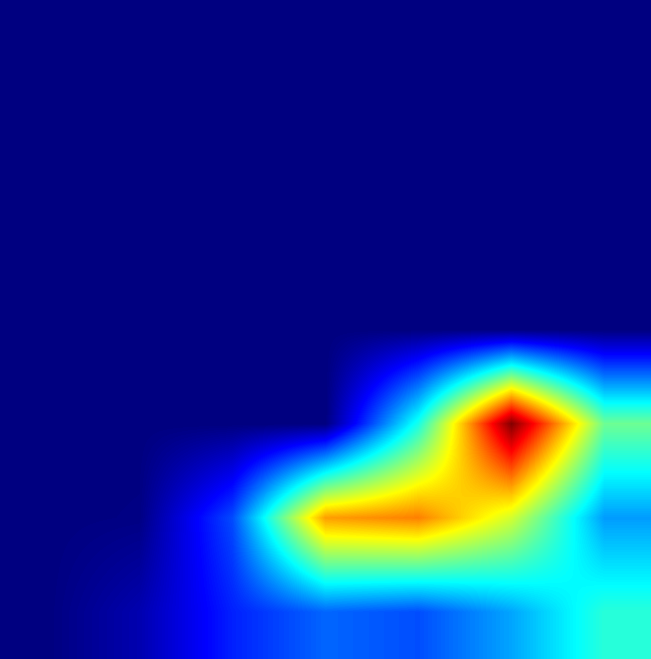

In [8]:
#  show cam image
cv2_imshow(cam3)

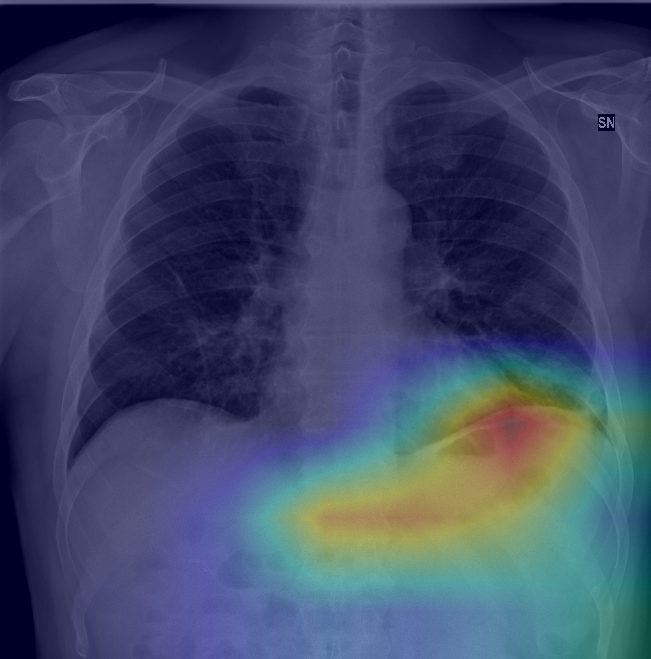

In [9]:

cv2_imshow(new_im)

# Lung Part

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img0 = cv2.imread('./assets/ex-covid.jpeg')

mask = np.zeros(cam3.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (300, 400, 600, 550)
# cv2.cvtColor(new_im, cv2.COLOR_RGBA2RGB)
cv2.grabCut(cam3,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = cam3*mask2[:,:,np.newaxis]

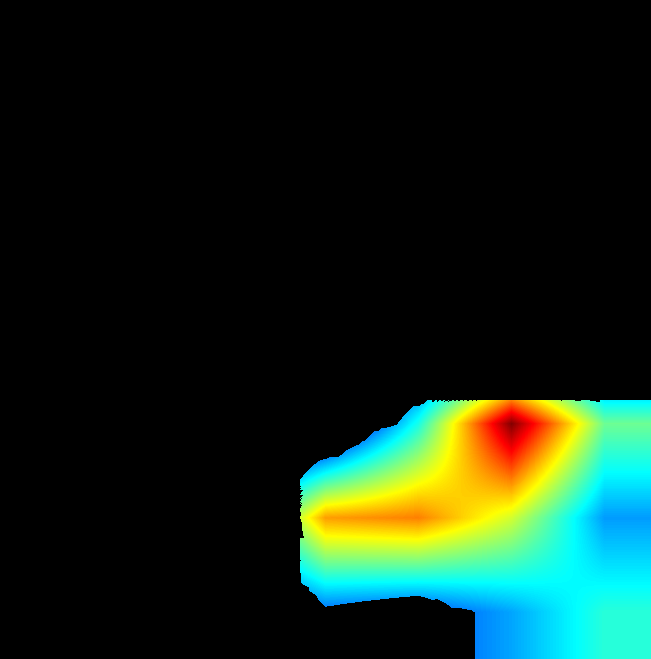

In [16]:
cv2_imshow(img)

# Method

## prepare the model

In [30]:
def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]


def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]


def process_image_file(filepath, top_percent, size):
    if filepath.split(".")[-1] == "npy":
        x_arr = np.load(filepath)
        x_arr = x_arr * 255.0 / x_arr.max()
        img = np.stack((x_arr, x_arr, x_arr), axis=-1)
    else:
        img = cv2.imread(filepath)

    processed_img = crop_top(img, percent=top_percent)
    processed_img = central_crop(processed_img)
    processed_img = cv2.resize(processed_img, (size, size))
    return processed_img, img


'''/////////////////////////main_grad/////////////////////////////'''

def main_grad(args_impath):
  # # add more photo
  # args_impath = "./covid-chestxray-dataset-master/images/000001-1.jpg"
  image_tensor = graph.get_tensor_by_name(args_in_tensorname)
  gradCam = GradCAM(graph=graph, classes = [0,1,2], outLayer=args_out_tensorname, targetLayer=final_conv_name)

  grads = gradCam.compute_grads()

  x, origin_im = process_image_file(args_impath, args_top_percent, args_input_size)
  img_arr = np.asanyarray(x)
  size_upsample = (origin_im.shape[1],origin_im.shape[0]) # (w, h)

  x = x.astype('float32') / 255.0
  output, grads_val = sess.run([gradCam.target, grads[mapping[args_pred_class]]], feed_dict={image_tensor: np.expand_dims(x, axis=0)})

  cam3 = generate_cam(output[0],grads_val[0],size_upsample)

  # Overlay cam on image
  cam3 = np.uint8(255*cam3)
  cam3 = cv2.applyColorMap(cam3, cv2.COLORMAP_JET)
  
  im_name = args_impath.split("/")[-1]
  ext = im_name.split(".")[-1]


  # show!!!!
  cam3_resize = cv.resize(cam3, (224, 224))
  
  # cv2.imwrite("cam-1.png", cam3_resize)
  

  new_im = cam3*0.3 + origin_im*0.5


  # Save the GradCAM
  cv2.imwrite("./output/"+os.path.join(args_outdir, "{}_{}png".format(args_pred_class, im_name.rstrip(ext))), new_im)

  # print("GradCAM image is save in ", args_outdir)

  # show images:
  # imagepath = "assets/ex-covid.jpeg"
  img_m = cv.imread(args_impath)
  img_m = cv.resize(img_m, (224, 224))

  # display(Image(imagepath))
  cv2_imshow(img_m)  # oringinal
  new_im_2 = cv.resize(new_im, (224, 224))
  cv2_imshow(new_im_2)  # grad-cam

  cv2_imshow(cam3_resize) # grad-cam-explain

  return img_m, new_im_2, cam3_resize

'''/////////////////////////main_grad/////////////////////////////'''

'''/////////////////////////bb_iou/////////////////////////////'''

def bb_intersection_over_union(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, (xB - xA + 1)) * max(0, (yB - yA + 1))
	print("interarea:", interArea)
	print("xA, yA, xB, yB:", xA, yA, xB, yB)
  
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = ((boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1))
	boxBArea = ((boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1))
	print("boxAArea:", boxAArea)
	print("boxBArea", boxBArea)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	print("boxAArea + boxBArea - interArea: ", boxAArea + boxBArea - interArea)
	print("iou: ", iou)
	# return the intersection over union value
	return iou

'''/////////////////////////bb_iou/////////////////////////////'''






class GradCAM:
    def __init__(self, graph, classes, outLayer, targetLayer=None):
        self.graph = graph
        self.classes = classes
        self.targetLayer = targetLayer
        self.outLayer = outLayer

        if self.targetLayer is None:
            self.target = self.find_target_tensor()
        else:
            self.target = self.graph.get_tensor_by_name(self.targetLayer)

    def find_target_tensor(self):
        """
        Find the last tensor that have 4D shape if targetLayer is not specified.
        :return:
        """
        tensor_names = [t.name for op in tf.get_default_graph().get_operations() for t in op.values() if
                   "save" not in str(t.name)]
        for tensor_name in reversed(tensor_names):
            tensor = self.graph.get_tensor_by_name(tensor_name)
            if len(tensor.shape) == 4:
                return tensor

        raise ValueError("Could not find 4D layer. Cannot apply GradCAM")

    def compute_grads(self):
        results = {} # grads of classes with keys being classes and values being normalized gradients
        for classIdx in self.classes:
            one_hot = tf.sparse_to_dense(classIdx, [len(self.classes)], 1.0)
            signal = tf.multiply(self.graph.get_tensor_by_name(self.outLayer),one_hot)
            loss = tf.reduce_mean(signal)

            grads = tf.gradients(loss, self.target)[0]

            norm_grads = tf.div(grads, tf.sqrt(tf.reduce_mean(tf.square(grads)))+tf.constant(1e-5))

            results[classIdx] = norm_grads

        return results


def generate_cam(conv_layer_out, grads_val, upsample_size):
    weights = np.mean(grads_val, axis=(0,1))
    cam = np.zeros(conv_layer_out.shape[0:2], dtype=np.float32)

    # Weight averaginng
    for i, w in enumerate(weights):
        cam += w*conv_layer_out[:,:,i]

    # Apply reLU
    cam = np.maximum(cam, 0)
    cam = cam/np.max(cam)
    cam = cv2.resize(cam, upsample_size)

    # Convert to 3D
    cam3 = np.expand_dims(cam, axis=2)
    cam3 = np.tile(cam3,[1,1,3])

    return cam3





## Prepare 30 images

In [3]:
img_num_set = [29, 51, 73, 75, 100, 125, 178, 199, 251, 257]
'''
 img_num_set = [29, 51, 73, 75, 100, 125, 178, 199, 244, 257,
                288, 297, 325, 361, 369, 478, 498, 509, 514, 642,
              #  659, 720, 757, 763, 823, 836, 877, 890, 913, 942]
'''
# 53: radiopaedia_org_covid-19-pneumonia-7_85703_0-dcm.nii.gz unknown
# 243: radiopaedia_org_covid-19-pneumonia-10_85902_3-dcm.nii.gz unknown

'\n img_num_set = [29, 51, 73, 75, 100, 125, 178, 199, 244, 257,\n                288, 297, 325, 361, 369, 478, 498, 509, 514, 642,\n              #  659, 720, 757, 763, 823, 836, 877, 890, 913, 942]\n'

In [4]:
# import metedata

metadata_covid_chest = './covid-chestxray-dataset-master/metadata.csv'
pd_reader = pd.read_csv(metadata_covid_chest)
print(pd_reader)

    patientid  offset sex   age                   finding RT_PCR_positive  \
0           2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1           2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2           2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3           2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4           4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   
..        ...     ...  ..   ...                       ...             ...   
945       479     0.0   F  40.0                 Pneumonia             NaN   
946       479    70.0   F  40.0                 Pneumonia             NaN   
947       480     NaN   M  26.0                 Pneumonia             NaN   
948       481     NaN   M  50.0                 Pneumonia             NaN   
949       481     NaN   M  50.0                 Pneumonia             NaN   

    survival intubated intubation_present went_icu  ...              date  

In [5]:
image_name_all =pd_reader['filename']
PCR_result_all = pd_reader['RT_PCR_positive']

In [6]:
pd_reader.index.rename('index', inplace=True)
# lines = pd_reader2['index']
pd_reader

patientid  offset sex   age                   finding RT_PCR_positive  \
index                                                                         
0             2     0.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
1             2     3.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
2             2     5.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
3             2     6.0   M  65.0  Pneumonia/Viral/COVID-19               Y   
4             4     0.0   F  52.0  Pneumonia/Viral/COVID-19               Y   
...         ...     ...  ..   ...                       ...             ...   
945         479     0.0   F  40.0                 Pneumonia             NaN   
946         479    70.0   F  40.0                 Pneumonia             NaN   
947         480     NaN   M  26.0                 Pneumonia             NaN   
948         481     NaN   M  50.0                 Pneumonia             NaN   
949         481     NaN   M  50.0                 Pneumonia             NaN   

      survival intubated intubation_present went_icu  ...              date  \
index                                                 ...                     
0            Y         N                  N        N  ...  January 22, 2020   
1            Y         N                  N        N  ...  January 25, 2020   
2            Y         N                  N        N  ...  January 27, 2020   
3            Y         N                  N        N  ...  January 28, 2020   
4          NaN         N                  N        N  ...  January 25, 2020   
...        ...       ...                ...      ...  ...               ...   
945        NaN       NaN                NaN      NaN  ...               NaN   
946        NaN       NaN                NaN      NaN  ...               NaN   
947        NaN       NaN                NaN      NaN  ...               NaN   
948        NaN       NaN                NaN      NaN  ...               NaN   
949        NaN       NaN                NaN      NaN  ...               NaN   

                                                location  folder  \
index                                                              
0            Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
1            Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
2            Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
3            Cho Ray Hospital, Ho Chi Minh City, Vietnam  images   
4      Changhua Christian Hospital, Changhua City, Ta...  images   
...                                                  ...     ...   
945                                       United Kingdom  images   
946                                       United Kingdom  images   
947                                                  NaN  images   
948                                                  NaN  images   
949                                                  NaN  images   

                                                filename  \
index                                                      
0      auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...   
1      auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...   
2      auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...   
3      auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...   
4                                  nejmc2001573_f1a.jpeg   
...                                                  ...   
945          072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg   
946          ff33c406392b968d483174c97eb857_jumbo-9.jpeg   
947                                       000001-266.jpg   
948                                       000001-272.jpg   
949                                       000002-268.jpg   

                        doi  \
index                         
0      10.1056/nejmc2001272   
1      10.1056/nejmc2001272   
2      10.1056/nejmc2001272   
3      10.1056/nejmc2001272   
4      10.1056/NEJMc2001573   
...                     ...   
945                     NaN   
946  

Num#: 29
ryct.2020200034.fig2.jpeg
Current img: ryct.2020200034.fig2.jpeg


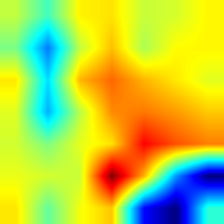

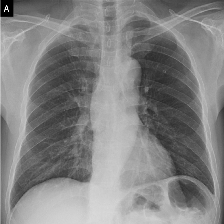

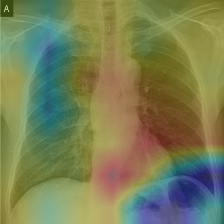

0 Y
Num#: 51
covid-19-pneumonia-7-PA.jpg
Current img: covid-19-pneumonia-7-PA.jpg


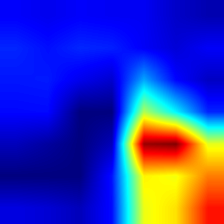

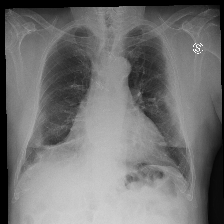

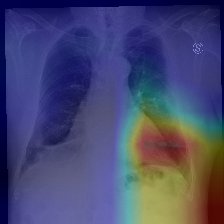

1 Y
Num#: 73
44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg
Current img: 44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg


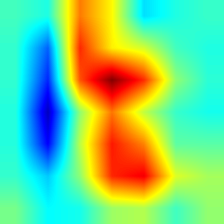

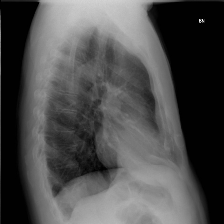

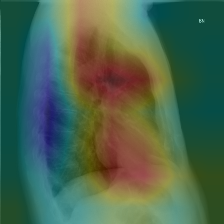

2 Y
Num#: 75
2C10A413-AABE-4807-8CCE-6A2025594067.jpeg
Current img: 2C10A413-AABE-4807-8CCE-6A2025594067.jpeg


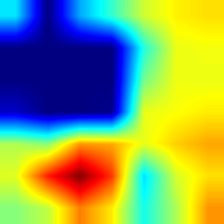

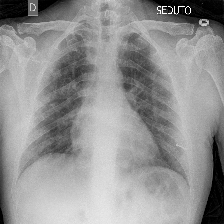

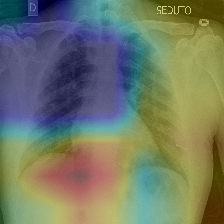

3 Y
Num#: 100
B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg
Current img: B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg


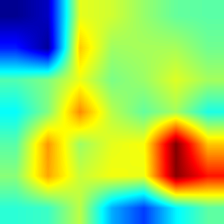

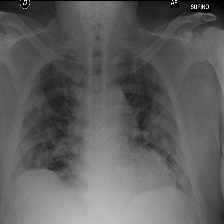

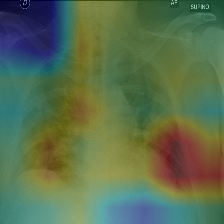

4 Y
Num#: 125
kjr-21-e24-g003-l-a.jpg
Current img: kjr-21-e24-g003-l-a.jpg


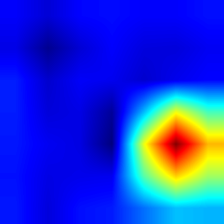

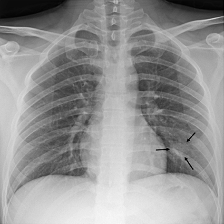

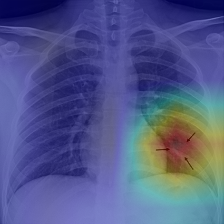

5 Y
Num#: 178
6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg
Current img: 6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg


<ipython-input-7-a0d802ca3a37>:148: RuntimeWarning: invalid value encountered in true_divide
  cam = cam/np.max(cam)


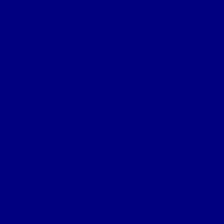

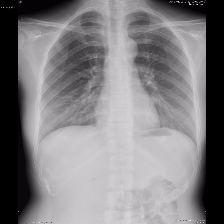

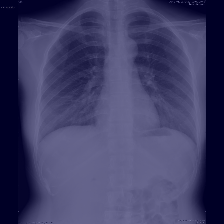

6 Unclear
Num#: 199
pneumocystis-carinii-pneumonia-1-PA.jpg
Current img: pneumocystis-carinii-pneumonia-1-PA.jpg


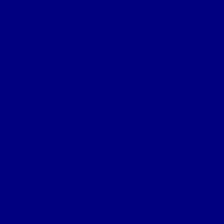

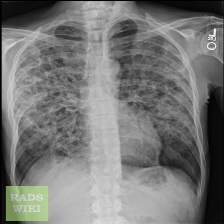

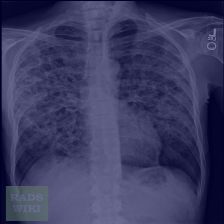

7 nan
Num#: 251
covid-19-caso-70-2-APS.jpg
Current img: covid-19-caso-70-2-APS.jpg


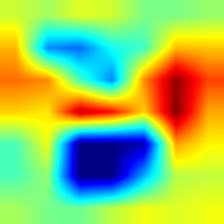

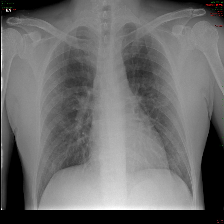

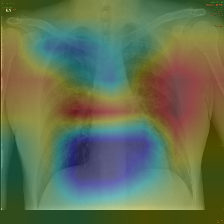

8 Y
Num#: 257
post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day7.jpg
Current img: post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day7.jpg


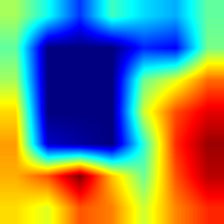

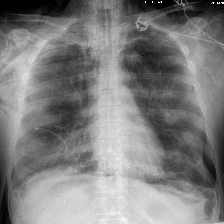

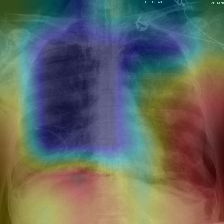

9 Y


In [ ]:
# # example 10
# for i in range(10):
#   num = img_num_set[i]
#   print("Num#:", num)
#   print(image_name_all[num])
#   temp_name = pd_reader['filename'][num]
#   print("Current img:", temp_name)
#   main_grad('./covid-chestxray-dataset-master/images/' + temp_name)
#   # main_grad('./covid-chestxray-dataset-master/images/' + image_name_all[num])
#   print(i, PCR_result_all[num])

## Prepare graph model

In [7]:
tf.disable_v2_behavior()
weightspath = 'models/COVIDNet-CXR-Large/' 
  
# arguments:
IMAGE_PATH ="assets/ex-covid.jpeg"
output_node_names = "dense_3/Softmax:0" #norm_dense_2/Softmax
final_conv_name="conv5_block3_3_conv/BiasAdd:0"  

model_path = 'models/COVIDNet-CXR-Large/model' #models/COVIDNet-CXR-2/model
model_path2 = 'models/COVIDNet-CXR-Large/model-8485'

metaname = 'model.meta'
ckptname = 'model'
args_n_classes = 2

args_testfolder = 'data/test'
args_trainfile = 'labels/train_COVIDx9B.txt'
args_testfile = 'labels/test_COVIDx9B.txt'

args_out_tensorname = 'dense_3/Softmax:0' #norm_dense_2/Softmax:0
args_logit_tensorname = 'norm_dense_2/MatMul:0'
args_is_severity_model = False
args_is_medusa_backbone = False

args_in_tensorname = 'input_1:0'
args_in_tensorname_medusa = 'input_1:0'
args_input_size = 224 # 480
args_input_size_medusa = 256
args_top_percent = 0.08

# save image
args_impath = "assets/ex-covid.jpeg"
args_pred_class = 'COVID-19'
args_outdir = './'

mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
inv_mapping = {0: 'normal', 1: 'pneumonia', 2: 'COVID-19'}



# if __name__ == '__main__':
sess = tf.Session()

saver = tf.train.import_meta_graph(model_path + '.meta')

saver.restore(sess, model_path2)

graph = tf.get_default_graph()

image_tensor = graph.get_tensor_by_name(args_in_tensorname)
gradCam = GradCAM(graph=graph, classes = [0,1,2], outLayer=args_out_tensorname, targetLayer=final_conv_name)

grads = gradCam.compute_grads()

x, origin_im = process_image_file(args_impath, args_top_percent, args_input_size)
img_arr = np.asanyarray(x)
size_upsample = (origin_im.shape[1],origin_im.shape[0]) # (w, h)

x = x.astype('float32') / 255.0
output, grads_val = sess.run([gradCam.target, grads[mapping[args_pred_class]]], feed_dict={image_tensor: np.expand_dims(x, axis=0)})

cam3 = generate_cam(output[0],grads_val[0],size_upsample)


# Overlay cam on image
cam3 = np.uint8(255*cam3)
cam3 = cv2.applyColorMap(cam3, cv2.COLORMAP_JET)

new_im = cam3*0.3 + origin_im*0.5

im_name = args_impath.split("/")[-1]
ext = im_name.split(".")[-1]

# Save the GradCAM
cv2.imwrite(os.path.join(args_outdir, "{}_{}png".format(args_pred_class, im_name.rstrip(ext))), new_im)

print("GradCAM image is save in ", args_outdir)


Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


GradCAM image is save in  ./


## Test once

Current img: ./assets/ex-covid.jpeg


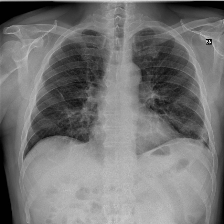

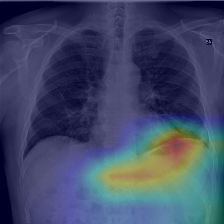

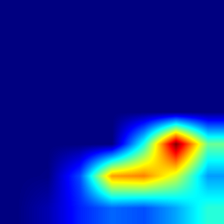

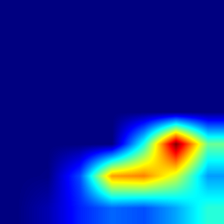

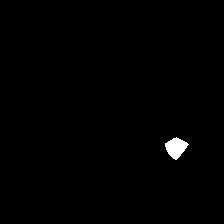

xmix is:  137 ; xmax is:  159 ; ymix is:  165 ; ymax is:  188
interarea: 378
xA, yA, xB, yB: 117 145 179 150
boxAArea: 15251
boxBArea 4032
boxAArea + boxBArea - interArea:  18905
iou:  0.019994710394075643


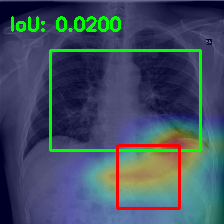

'/////////////////////////main-result/////////////////////////////'

In [26]:
# Test for example image


'''/////////////////////////main_grad use/////////////////////////////'''
temp_name = './assets/ex-covid.jpeg'
print("Current img:", temp_name)
# img_m = cv.imread(temp_name)
# img_m = cv.resize(img_m, (224, 224))
# cv2_imshow(img_m)
img_m, new_im_2, cam3_resize = main_grad(temp_name)
# print(i, PCR_result_all[num])
'''/////////////////////////main_grad use/////////////////////////////'''


'''/////////////////////////show grad-cam area/////////////////////////////'''

img = cam3_resize
# 在彩色图像的情况下，解码图像将以b g r顺序存储通道。
grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 从RGB色彩空间转换到HSV色彩空间
grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

# H、S、V范围一：
lower1 = np.array([0,30,46])
upper1 = np.array([10,255,255])
mask1 = cv2.inRange(grid_HSV, lower1, upper1)       # mask1 为二值图像
res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

# H、S、V范围二：
lower2 = np.array([156,30,46])
upper2 = np.array([180,255,255])
mask2 = cv2.inRange(grid_HSV, lower2, upper2)
res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

# 将两个二值图像结果 相加
mask3 = mask1 + mask2

# 结果显示
cv2_imshow(img)
cv2_imshow(mask3)  #"mask3", 
# cv2_imshow(mask1) 
# cv2_imshow(mask2) 


temp = 0
list = []
for j in range(len(mask3)):
  for k in range(len(mask3[0])):
    if mask3[j][k] == 0:

      pass
    else:

      temp = mask3[j][k]
      if temp < mask3[j][k]:
        temp = mask3[j][k]
      list.append([j, k])
# cv2_imshow(mask3)


# list
xminn = 999
yminn = 999
xmaxn = 0
ymaxn = 0
for i in range(len(list)):
  if xminn > list[i][0]:
    xminn = list[i][0]
  elif xmaxn < list[i][0]:
    xmaxn = list[i][0]
  if yminn > list[i][1]:
    yminn = list[i][1]
  elif ymaxn < list[i][1]:
    ymaxn = list[i][1]

print("xmix is: ", xminn, "; xmax is: ", xmaxn, "; ymix is: ", yminn, "; ymax is: ", ymaxn)

'''/////////////////////////show grad-cam area/////////////////////////////'''

'''/////////////////////////main-result/////////////////////////////'''

# detection = Detection('COVID-19_ex-covid.png', [100, 100, 550, 500], [300, 400, 600, 550]) # ./assets/ex-covid.jpeg

# image = cv2.imread(detection.image_path)
image = new_im_2
# draw the ground-truth bounding box along with the predicted

# bounding box

# # left lung
# rect = plt.Rectangle((0.1,10), 20, 30, fill=False, edgecolor = 'red',linewidth=1)  
# # right lung
# rect2 = plt.Rectangle((25,10), 20, 30, fill=False, edgecolor = 'red',linewidth=1)  
# rect = plt.Rectangle((0.1,10), 45, 30, fill=False, edgecolor = 'red',linewidth=1)
detection1 = [50, 50, 200, 150] #15, 15, 200, 200
# xmix is:  137 ; xmax is:  159 ; ymix is:  165 ; ymax is:  188
detection2 = [xminn-20, yminn-20, xmaxn+20, ymaxn+20]
start_point1 = [50, 50]  #10,10
end_point1 = [200, 150]  #200,150
color1 = (0, 255, 0)
start_point2 = [xminn-20, yminn-20]   # 137
end_point2 = [xmaxn+20, ymaxn+20]  # 188
color2 = (0, 0, 255)
thickness = 2


cv2.rectangle(image, start_point1, end_point1, color1, thickness)
cv2.rectangle(image, start_point2, end_point2, color2, thickness)
# cv2.rectangle(image, tuple(detection.gt[:2]), 
#   tuple(detection.gt[2:]), (0, 255, 0), 2)
# cv2.rectangle(image, tuple(detection.pred[:2]), 
#   tuple(detection.pred[2:]), (0, 0, 255), 2)


# compute the intersection over union and display it
iou = bb_intersection_over_union(detection1, detection2)
# iou = bb_intersection_over_union(detection.gt, detection.pred)
cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
  cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
# print("{}: {:.8f}".format(detection.image_path, iou))


# array1 = np.array([15, 15, 200, 200]) #detection.gt
# array2 = np.array([minn, minn, maxn, maxn]) #detection.pred
# iou2 = IoU(array1, array2)
# print("iou2", iou2[0])

# show the output image
cv2_imshow(image)


'''/////////////////////////main-result/////////////////////////////'''


## loop

In [29]:
# create folder to save
!mkdir ./output/

Current img: ryct.2020200034.fig2.jpeg


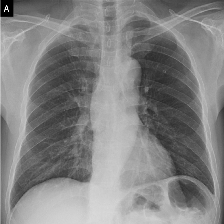

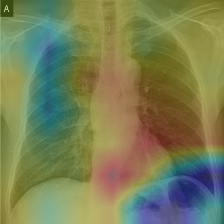

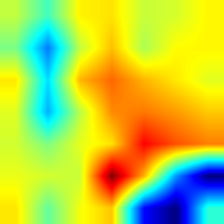

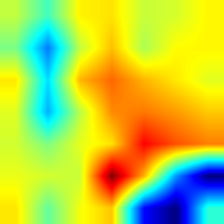

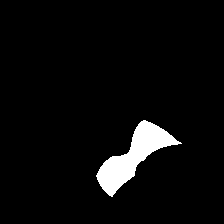

xmix is:  120 ; xmax is:  196 ; ymix is:  96 ; ymax is:  181
interarea: 7575
xA, yA, xB, yB: 100 76 200 150
boxAArea: 15251
boxBArea 14742
boxAArea + boxBArea - interArea:  22418
iou:  0.3378981175840842


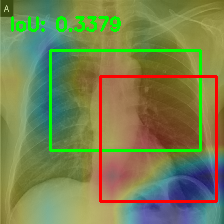

Current img: covid-19-pneumonia-7-PA.jpg


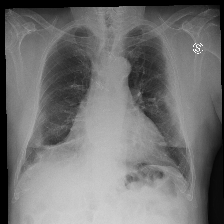

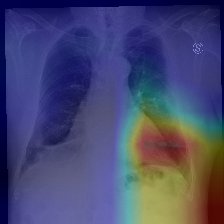

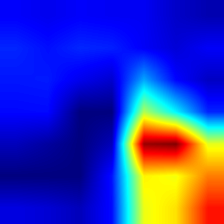

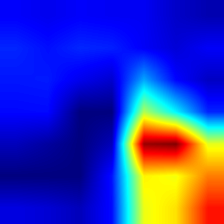

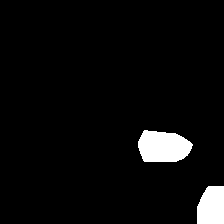

xmix is:  130 ; xmax is:  223 ; ymix is:  138 ; ymax is:  223
interarea: 3003
xA, yA, xB, yB: 110 118 200 150
boxAArea: 15251
boxBArea 16884
boxAArea + boxBArea - interArea:  29132
iou:  0.10308252093917342


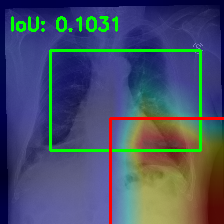

Current img: 44C8E3D6-20DA-42E9-B33B-96FA6D6DE12F.jpeg


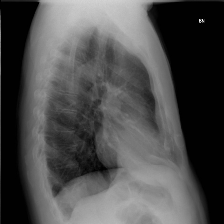

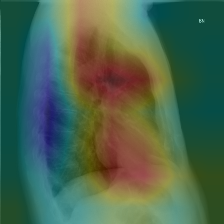

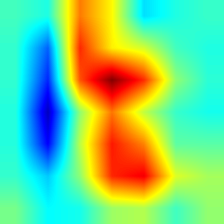

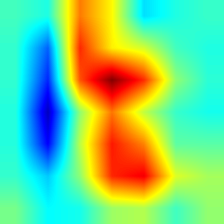

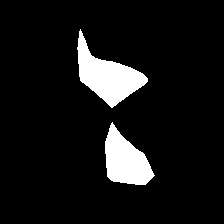

xmix is:  29 ; xmax is:  184 ; ymix is:  77 ; ymax is:  154
interarea: 14194
xA, yA, xB, yB: 50 57 200 150
boxAArea: 15251
boxBArea 23128
boxAArea + boxBArea - interArea:  24185
iou:  0.5868927020880711


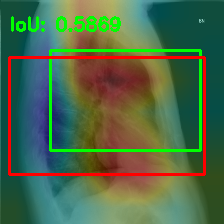

Current img: 2C10A413-AABE-4807-8CCE-6A2025594067.jpeg


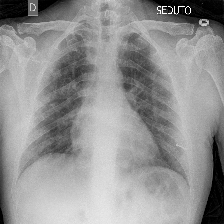

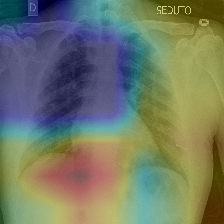

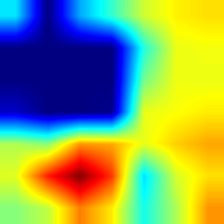

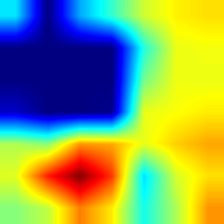

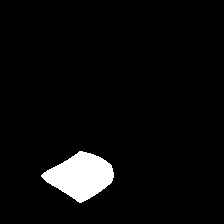

xmix is:  151 ; xmax is:  202 ; ymix is:  41 ; ymax is:  113
interarea: 5880
xA, yA, xB, yB: 131 50 200 133
boxAArea: 15251
boxBArea 10396
boxAArea + boxBArea - interArea:  19767
iou:  0.29746547275762636


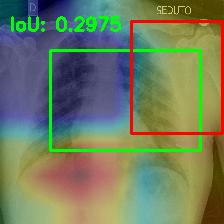

Current img: B59DD164-51D5-40DF-A926-6A42DD52EBE8.jpeg


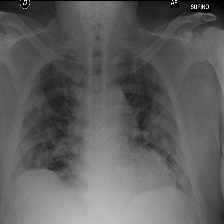

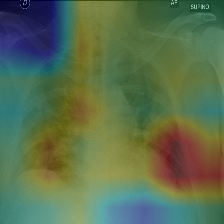

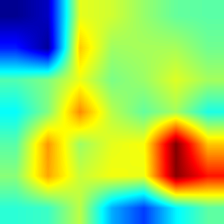

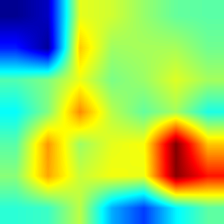

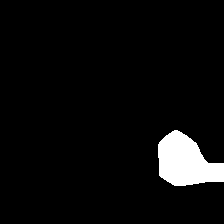

xmix is:  130 ; xmax is:  185 ; ymix is:  158 ; ymax is:  223
interarea: 1183
xA, yA, xB, yB: 110 138 200 150
boxAArea: 15251
boxBArea 10176
boxAArea + boxBArea - interArea:  24244
iou:  0.048795578287411316


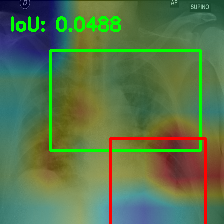

Current img: kjr-21-e24-g003-l-a.jpg


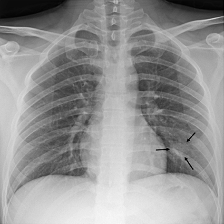

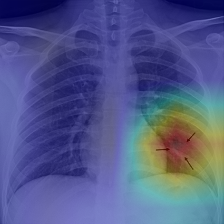

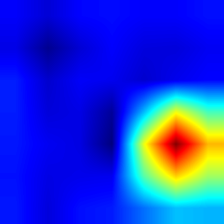

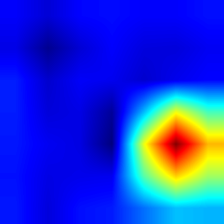

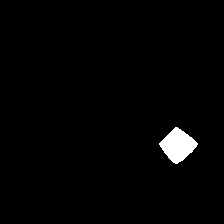

xmix is:  127 ; xmax is:  163 ; ymix is:  159 ; ymax is:  197
interarea: 924
xA, yA, xB, yB: 107 139 183 150
boxAArea: 15251
boxBArea 6083
boxAArea + boxBArea - interArea:  20410
iou:  0.045271925526702596


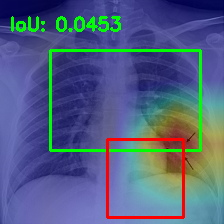

Current img: 6b44464d-73a7-4cf3-bbb6-ffe7168300e3.annot.original.jpeg


<ipython-input-30-f9ccfe4f40cf>:171: RuntimeWarning: invalid value encountered in true_divide
  cam = cam/np.max(cam)


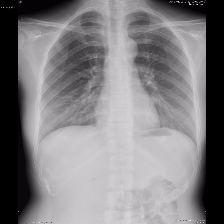

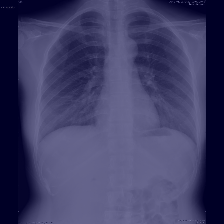

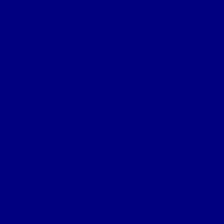

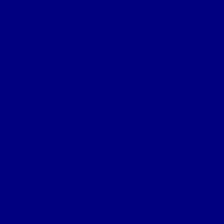

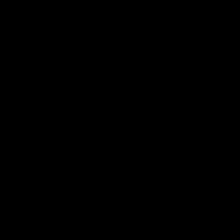

xmix is:  999 ; xmax is:  0 ; ymix is:  999 ; ymax is:  0
interarea: 0
xA, yA, xB, yB: 979 979 20 20
boxAArea: 15251
boxBArea 917764
boxAArea + boxBArea - interArea:  933015
iou:  0.0


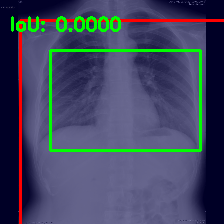

Current img: pneumocystis-carinii-pneumonia-1-PA.jpg


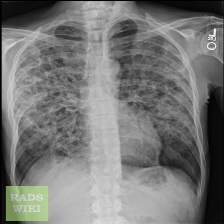

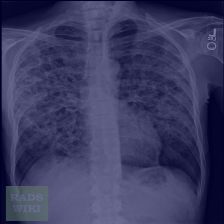

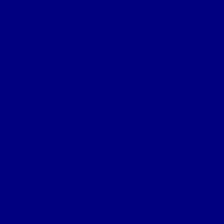

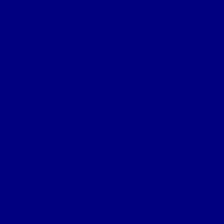

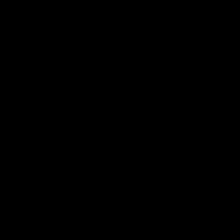

xmix is:  999 ; xmax is:  0 ; ymix is:  999 ; ymax is:  0
interarea: 0
xA, yA, xB, yB: 979 979 20 20
boxAArea: 15251
boxBArea 917764
boxAArea + boxBArea - interArea:  933015
iou:  0.0


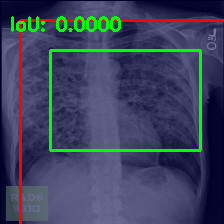

Current img: covid-19-caso-70-2-APS.jpg


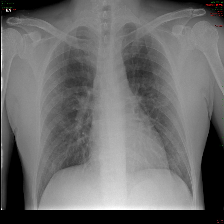

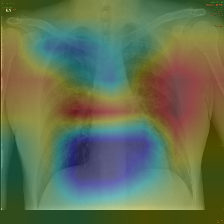

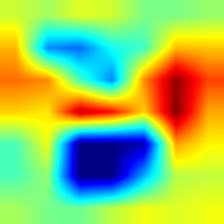

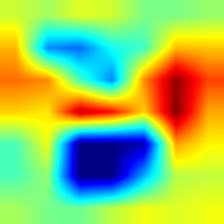

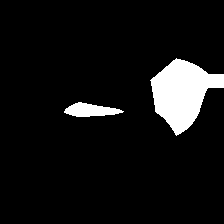

xmix is:  58 ; xmax is:  135 ; ymix is:  64 ; ymax is:  223
interarea: 10706
xA, yA, xB, yB: 50 50 155 150
boxAArea: 15251
boxBArea 23600
boxAArea + boxBArea - interArea:  28145
iou:  0.3803872801563333


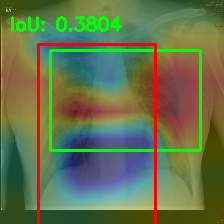

Current img: post-intubuation-pneumomediastium-and-pneumothorax-background-covid-19-pneumonia-day7.jpg


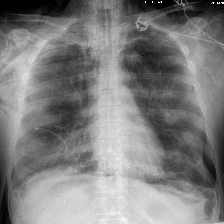

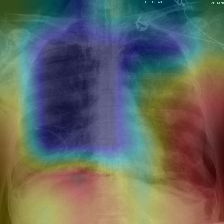

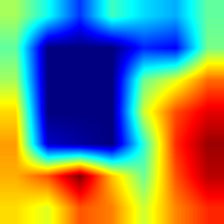

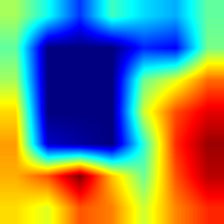

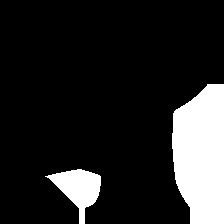

xmix is:  84 ; xmax is:  223 ; ymix is:  45 ; ymax is:  223
interarea: 13837
xA, yA, xB, yB: 64 50 200 150
boxAArea: 15251
boxBArea 39420
boxAArea + boxBArea - interArea:  40834
iou:  0.3388597737179801


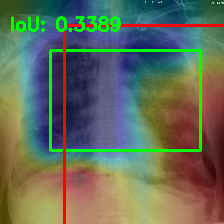

In [31]:
# change into loop

# for i in range(10):
#   num = img_num_set[i]
#   print("Num#:", num)
#   print(image_name_all[num])
#   temp_name = pd_reader['filename'][num]
#   print("Current img:", temp_name)
#   main_grad('./covid-chestxray-dataset-master/images/' + temp_name)
#   # main_grad('./covid-chestxray-dataset-master/images/' + image_name_all[num])
#   print(i, PCR_result_all[num])


for i in range(10):
  '''/////////////////////////main_grad use/////////////////////////////'''
  num = img_num_set[i]
  temp_name = pd_reader['filename'][num]
  # temp_name = './assets/ex-covid.jpeg'
  print("Current img:", temp_name)
  # img_m = cv.imread(temp_name)
  # img_m = cv.resize(img_m, (224, 224))
  # cv2_imshow(img_m)
  img_m, new_im_2, cam3_resize = main_grad('./covid-chestxray-dataset-master/images/' + temp_name)
  # print(i, PCR_result_all[num])
  '''/////////////////////////main_grad use/////////////////////////////'''


  '''/////////////////////////show grad-cam area/////////////////////////////'''

  img = cam3_resize
  # 在彩色图像的情况下，解码图像将以b g r顺序存储通道。
  grid_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # 从RGB色彩空间转换到HSV色彩空间
  grid_HSV = cv2.cvtColor(grid_RGB, cv2.COLOR_RGB2HSV)

  # H、S、V范围一：
  lower1 = np.array([0,30,46])
  upper1 = np.array([10,255,255])
  mask1 = cv2.inRange(grid_HSV, lower1, upper1)       # mask1 为二值图像
  res1 = cv2.bitwise_and(grid_RGB, grid_RGB, mask=mask1)

  # H、S、V范围二：
  lower2 = np.array([156,30,46])
  upper2 = np.array([180,255,255])
  mask2 = cv2.inRange(grid_HSV, lower2, upper2)
  res2 = cv2.bitwise_and(grid_RGB,grid_RGB, mask=mask2)

  # 将两个二值图像结果 相加
  mask3 = mask1 + mask2

  # 结果显示
  cv2_imshow(img)
  cv2_imshow(mask3)  #"mask3", 
  # cv2_imshow(mask1) 
  # cv2_imshow(mask2) 


  temp = 0
  list = []
  for j in range(len(mask3)):
    for k in range(len(mask3[0])):
      if mask3[j][k] == 0:

        pass
      else:

        temp = mask3[j][k]
        if temp < mask3[j][k]:
          temp = mask3[j][k]
        list.append([j, k])
  # cv2_imshow(mask3)


  # list
  xminn = 999
  yminn = 999
  xmaxn = 0
  ymaxn = 0
  for i in range(len(list)):
    if xminn > list[i][0]:
      xminn = list[i][0]
    elif xmaxn < list[i][0]:
      xmaxn = list[i][0]
    if yminn > list[i][1]:
      yminn = list[i][1]
    elif ymaxn < list[i][1]:
      ymaxn = list[i][1]

  print("xmix is: ", xminn, "; xmax is: ", xmaxn, "; ymix is: ", yminn, "; ymax is: ", ymaxn)

  '''/////////////////////////show grad-cam area/////////////////////////////'''

  '''/////////////////////////main-result/////////////////////////////'''

  # detection = Detection('COVID-19_ex-covid.png', [100, 100, 550, 500], [300, 400, 600, 550]) # ./assets/ex-covid.jpeg

  # image = cv2.imread(detection.image_path)
  image = new_im_2
  # draw the ground-truth bounding box along with the predicted

  # bounding box

  # # left lung
  # rect = plt.Rectangle((0.1,10), 20, 30, fill=False, edgecolor = 'red',linewidth=1)  
  # # right lung
  # rect2 = plt.Rectangle((25,10), 20, 30, fill=False, edgecolor = 'red',linewidth=1)  
  # rect = plt.Rectangle((0.1,10), 45, 30, fill=False, edgecolor = 'red',linewidth=1)
  detection1 = [50, 50, 200, 150] #15, 15, 200, 200
  detection2 = [xminn-20, yminn-20, xmaxn+20, ymaxn+20]
  start_point1 = [50, 50]  #10,10
  end_point1 = [200, 150]  #200,150
  color1 = (0, 255, 0)
  start_point2 = [xminn-20, yminn-20]   # 137
  end_point2 = [xmaxn+20, ymaxn+20]  # 188
  color2 = (0, 0, 255)
  thickness = 2


  cv2.rectangle(image, start_point1, end_point1, color1, thickness)
  cv2.rectangle(image, start_point2, end_point2, color2, thickness)
  # cv2.rectangle(image, tuple(detection.gt[:2]), 
  #   tuple(detection.gt[2:]), (0, 255, 0), 2)
  # cv2.rectangle(image, tuple(detection.pred[:2]), 
  #   tuple(detection.pred[2:]), (0, 0, 255), 2)


  # compute the intersection over union and display it
  iou = bb_intersection_over_union(detection1, detection2)
  # iou = bb_intersection_over_union(detection.gt, detection.pred)
  cv2.putText(image, "IoU: {:.4f}".format(iou), (10, 30),
    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
  # print("{}: {:.8f}".format(detection.image_path, iou))


  # array1 = np.array([15, 15, 200, 200]) #detection.gt
  # array2 = np.array([minn, minn, maxn, maxn]) #detection.pred
  # iou2 = IoU(array1, array2)
  # print("iou2", iou2[0])

  # show the output image
  cv2_imshow(image)
  cv2.imwrite("./output/IOU_"+temp_name, image)


  '''/////////////////////////main-result/////////////////////////////'''


In [32]:
# save
!cp -r ./output/ 'drive/MyDrive/covid/IOU_ex/'